In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Understanding

### Data Loading

In [2]:
df_ratings = pd.read_csv('ml-latest/ratings.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [3]:
df_movies = pd.read_csv('ml-latest/movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller


In [4]:
df_tags = pd.read_csv('ml-latest/tags.csv')
df_tags

,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558
1,10,260,Harrison Ford,1430666505
2,10,260,sci-fi,1430666538
3,14,1221,Al Pacino,1311600756
4,14,1221,mafia,1311600746
...,...,...,...,...
2328310,330923,176599,politically correct,1507547491
2328311,330933,3317,coming of age,1351279384
2328312,330933,3317,sexuality,1351279389
2328313,330947,5782,Not Luc Besson,1154110902


In [5]:
df_genome_scores = pd.read_csv('ml-latest/genome-scores.csv')
df_genome_scores

,movieId,tagId,relevance
0,1,1,0.03200
1,1,2,0.02225
2,1,3,0.07000
3,1,4,0.05900
4,1,5,0.12300
...,...,...,...
18472123,288167,1124,0.09875
18472124,288167,1125,0.02950
18472125,288167,1126,0.02275
18472126,288167,1127,0.11225


In [6]:
df_genome_tags = pd.read_csv('ml-latest/genome-tags.csv')
df_genome_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


### Exploratory Data Analysis

#### Mengecek Tipe Data

In [7]:
df_genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18472128 entries, 0 to 18472127
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 422.8 MB


In [8]:
df_genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [10]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


In [11]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328315 entries, 0 to 2328314
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 71.1+ MB


#### Mengecek Missing Value

In [12]:
df_genome_scores.isna().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [13]:
df_genome_tags.isna().sum()

tagId    0
tag      0
dtype: int64

In [14]:
df_movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [15]:
df_ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [16]:
df_tags.isna().sum()

userId        0
movieId       0
tag          17
timestamp     0
dtype: int64

#### Mengecek Duplikasi Data

In [17]:
df_genome_scores.duplicated().sum()

0

In [18]:
df_genome_tags.duplicated().sum()

0

In [19]:
df_movies.duplicated().sum()

0

In [20]:
df_ratings.duplicated().sum()

0

In [21]:
df_tags.duplicated().sum()

0

#### Mengecek Distribusi Data

In [22]:
df_genome_scores.describe()

,movieId,tagId,relevance
count,1.847213e+07,1.847213e+07,1.847213e+07
mean,6.421529e+04,5.645000e+02,1.111024e-01
std,7.245929e+04,3.256254e+02,1.499273e-01
min,1.000000e+00,1.000000e+00,2.500000e-04
25%,4.528750e+03,2.827500e+02,2.250000e-02
50%,3.292100e+04,5.645000e+02,5.325000e-02
75%,1.082962e+05,8.462500e+02,1.340000e-01
max,2.881670e+05,1.128000e+03,1.000000e+00


<Axes: >

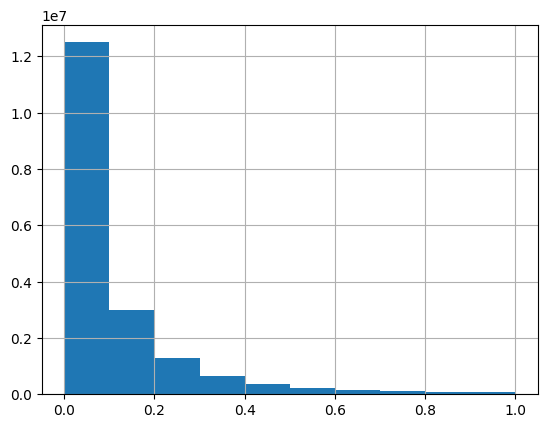

In [23]:
df_genome_scores['relevance'].hist()

In [24]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,3.383216e+07,3.383216e+07,3.383216e+07,3.383216e+07
mean,1.654380e+05,2.831348e+04,3.542540e+00,1.269362e+09
std,9.534122e+04,4.992865e+04,1.063959e+00,2.541023e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,8.295300e+04,1.219000e+03,3.000000e+00,1.046718e+09
50%,1.661290e+05,3.263000e+03,4.000000e+00,1.264740e+09
75%,2.474500e+05,4.049100e+04,4.000000e+00,1.496919e+09
max,3.309750e+05,2.889830e+05,5.000000e+00,1.689843e+09


<Axes: >

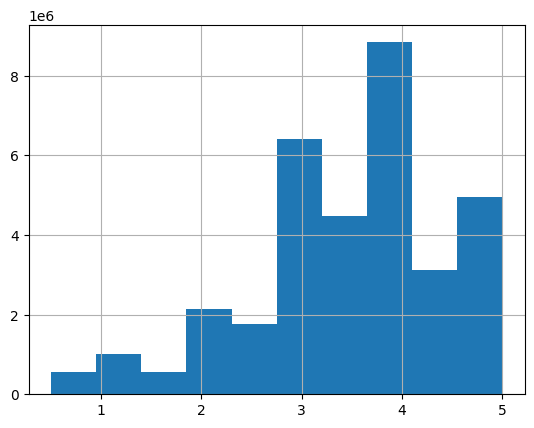

In [25]:
df_ratings['rating'].hist()

#### Memperbaiki Missing Value

In [26]:
df_tags[df_tags['tag'].isna()]

,userId,movieId,tag,timestamp
530012,104413,123,NaN,1199450867
530013,104413,346,NaN,1199451946
530017,104413,1184,NaN,1199452261
530024,104413,1785,NaN,1199452006
530025,104413,2194,NaN,1199450677
530027,104413,2691,NaN,1199451002
530035,104413,4103,NaN,1199451920
530037,104413,4473,NaN,1199451040
530039,104413,4616,NaN,1199452441
530055,104413,7624,NaN,1199452266


In [27]:
df_tags.dropna(inplace=True)
df_tags.reset_index(drop=True)

,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558
1,10,260,Harrison Ford,1430666505
2,10,260,sci-fi,1430666538
3,14,1221,Al Pacino,1311600756
4,14,1221,mafia,1311600746
...,...,...,...,...
2328293,330923,176599,politically correct,1507547491
2328294,330933,3317,coming of age,1351279384
2328295,330933,3317,sexuality,1351279389
2328296,330947,5782,Not Luc Besson,1154110902
